In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libs
import pandas as pd
import numpy as np


In [3]:
#reading the dataset
dataset=pd.read_csv("day.csv")

In [4]:
#descriptive analysis
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#checking for null chars
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#Assigning string season values to numeric season values
#1-Spring
dataset.loc[(dataset['season']==1), 'season']='spring'
#2-Summer
dataset.loc[(dataset['season']==2), 'season']='summer'
#3-Fall
dataset.loc[(dataset['season']==3), 'season']='fall'
#4-Winter
dataset.loc[(dataset['season']==4), 'season']='winter'

In [11]:
#checking days in season
dataset['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
#Assigning string values to months 
def month_mapping(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [13]:
dataset['mnth'].astype('category').value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [14]:
dataset[['mnth']]=dataset[['mnth']].apply(month_mapping)

In [15]:
dataset['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [16]:
#mapping weeksdays
def weekday_mapping(x):
    return x.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4:'Thu',5:'Fri',6:'Sat',0:'Sun'})


In [17]:
dataset[['weekday']]=dataset[['weekday']].apply(weekday_mapping)

In [18]:
dataset['weekday'].astype('category').value_counts()

Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

In [19]:
dataset['weathersit'].astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [20]:
#Weathersit assignment
#1- Clear
dataset.loc[(dataset['weathersit']==1), 'weathersit']='A'
#2- Mist
dataset.loc[(dataset['weathersit']==2), 'weathersit']='B'
#3- Light snow
dataset.loc[(dataset['weathersit']==3), 'weathersit']='C'

In [21]:
dataset['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [22]:
#Data Visualisation

In [23]:
#importing libs
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

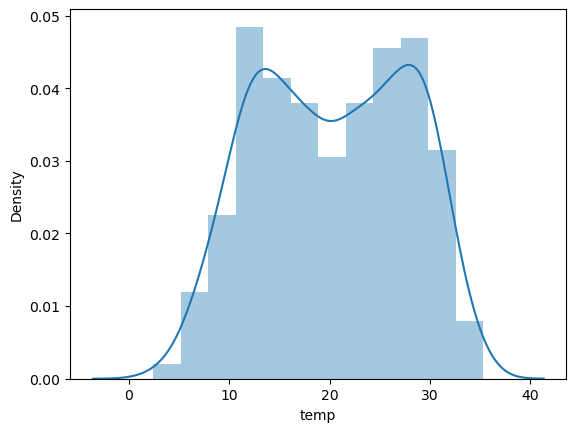

In [24]:
sns.distplot(dataset['temp'])


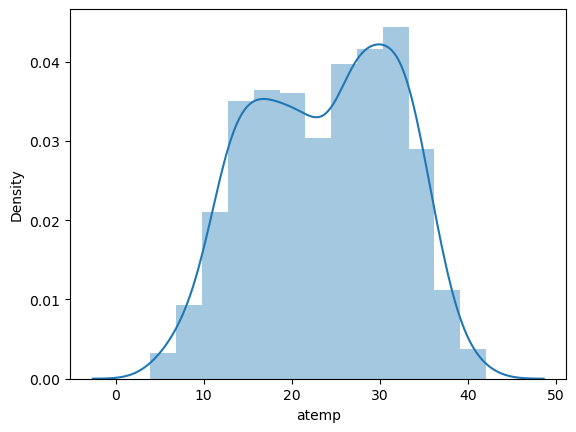

In [25]:
#actual temp
sns.distplot(dataset['atemp'])
plt.show()

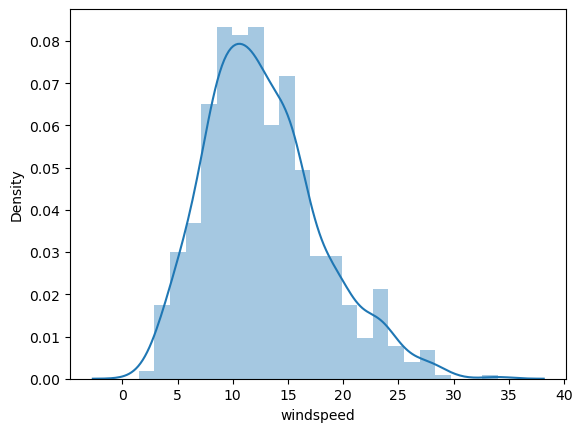

In [26]:
#Windspeed
sns.distplot(dataset['windspeed'])
plt.show()

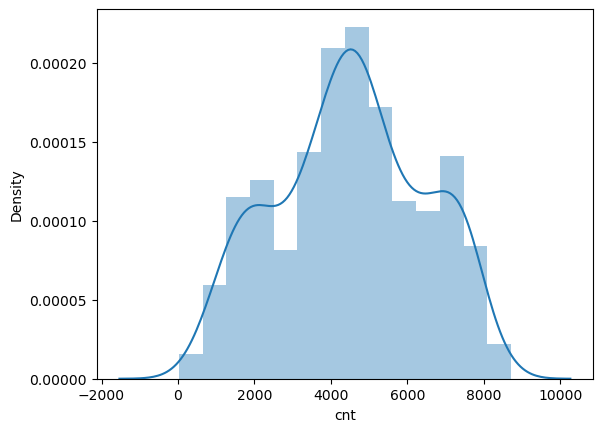

In [27]:
#Target variable count of total rented bikes
sns.distplot(dataset['cnt'])
plt.show()

In [28]:
#converting date into datetime format
dataset['dteday']=dataset['dteday'].astype('datetime64')

In [29]:
#selecting categoraical vars
dataset_categorical=dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [30]:
dataset_categorical.columns
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thu,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


<Axes: xlabel='workingday', ylabel='cnt'>

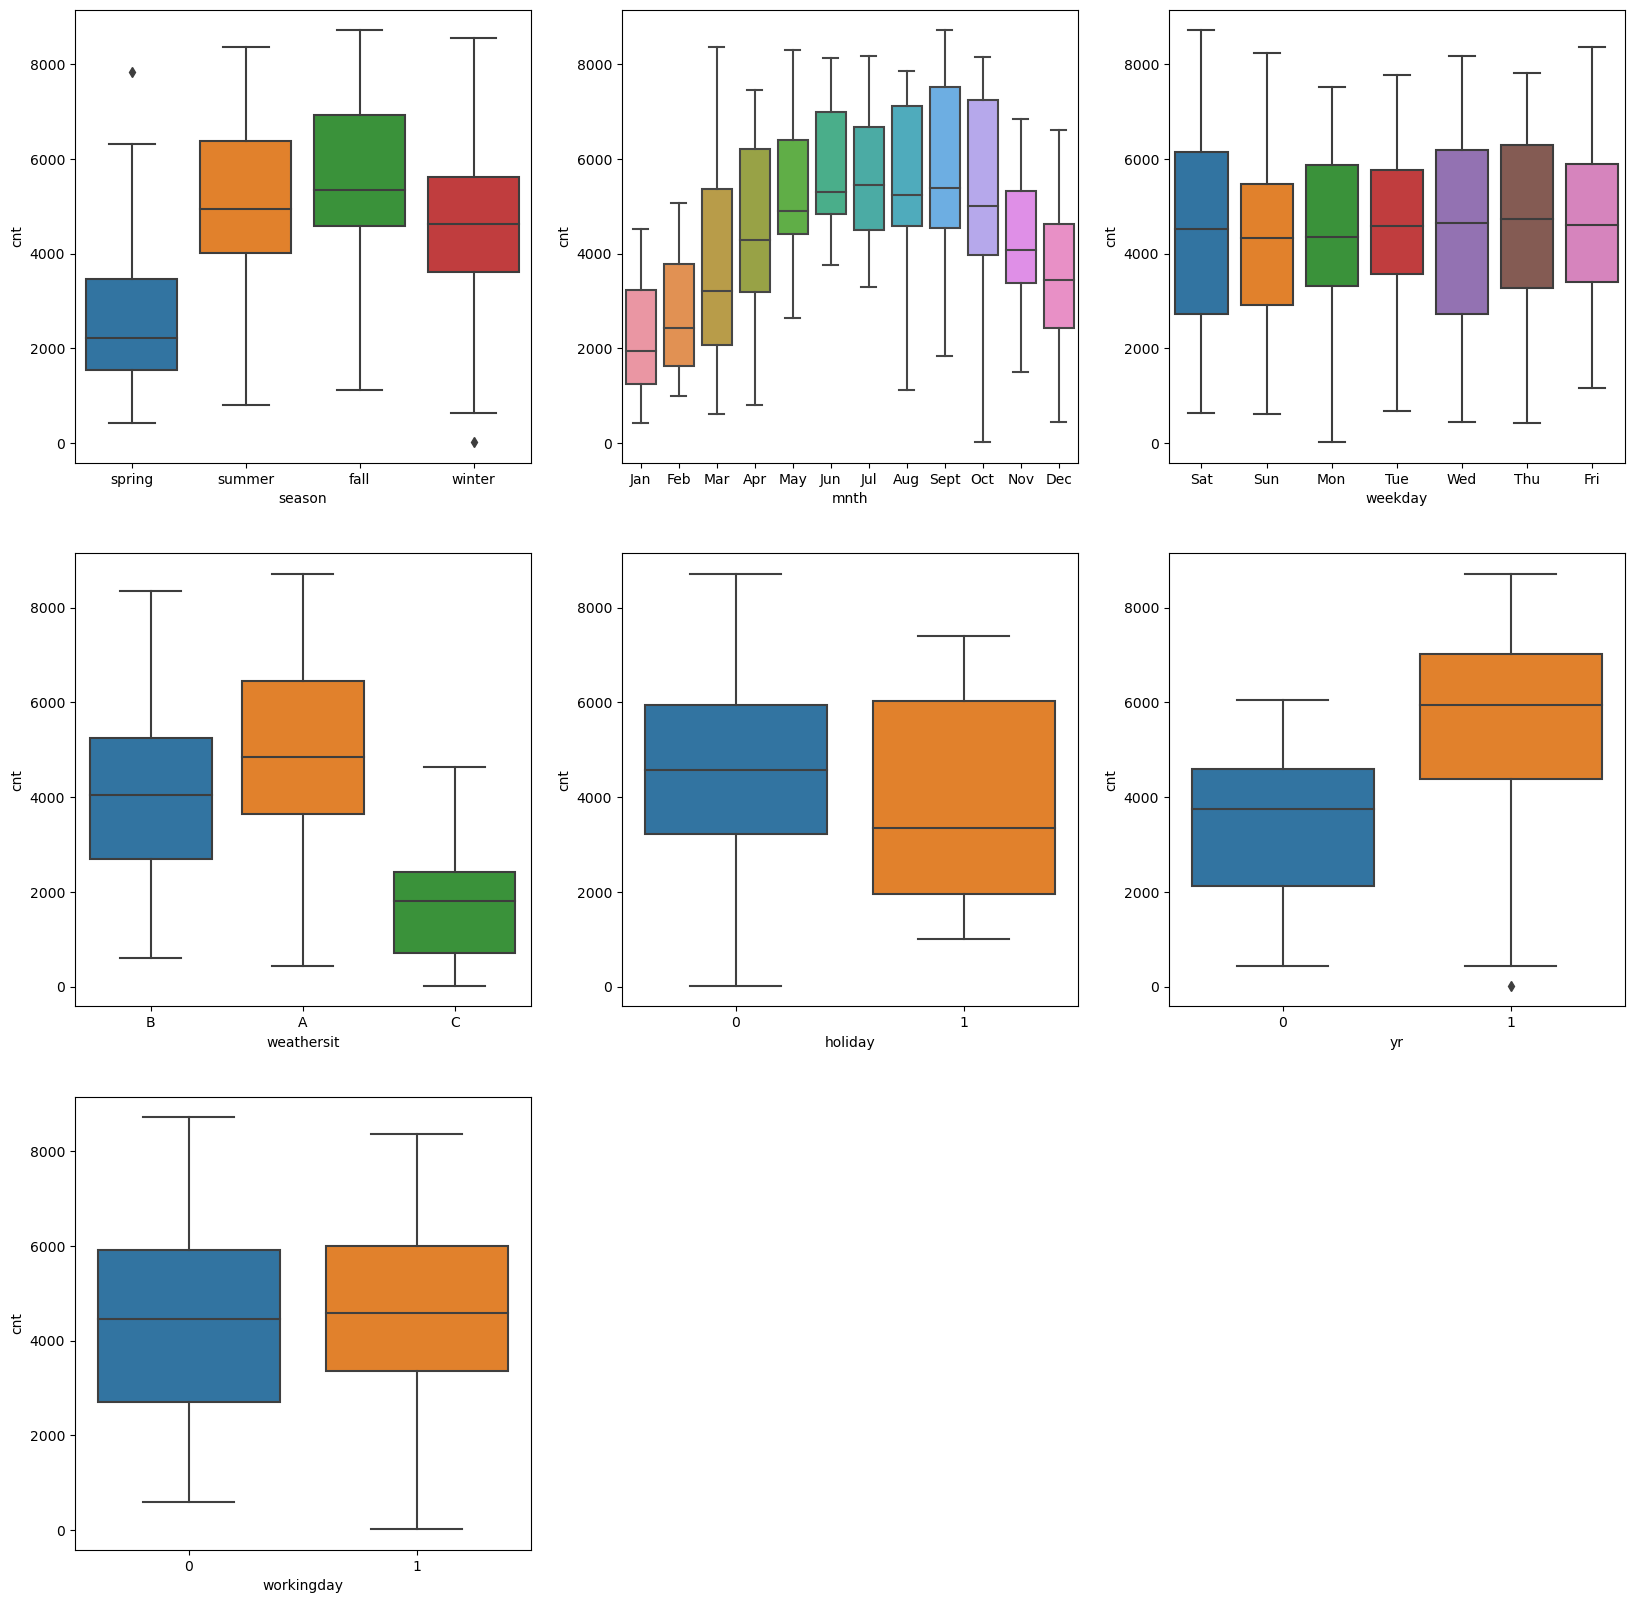

In [31]:
#analysing categorical data with count of bikes
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt', data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt', data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt', data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt', data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt', data=dataset)

In [32]:
#relation of integer vars
intVarlist=["casual","registered","cnt"]
for var in intVarlist:
    dataset[var]=dataset[var].astype("float")

In [33]:
dataset_numeric=dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


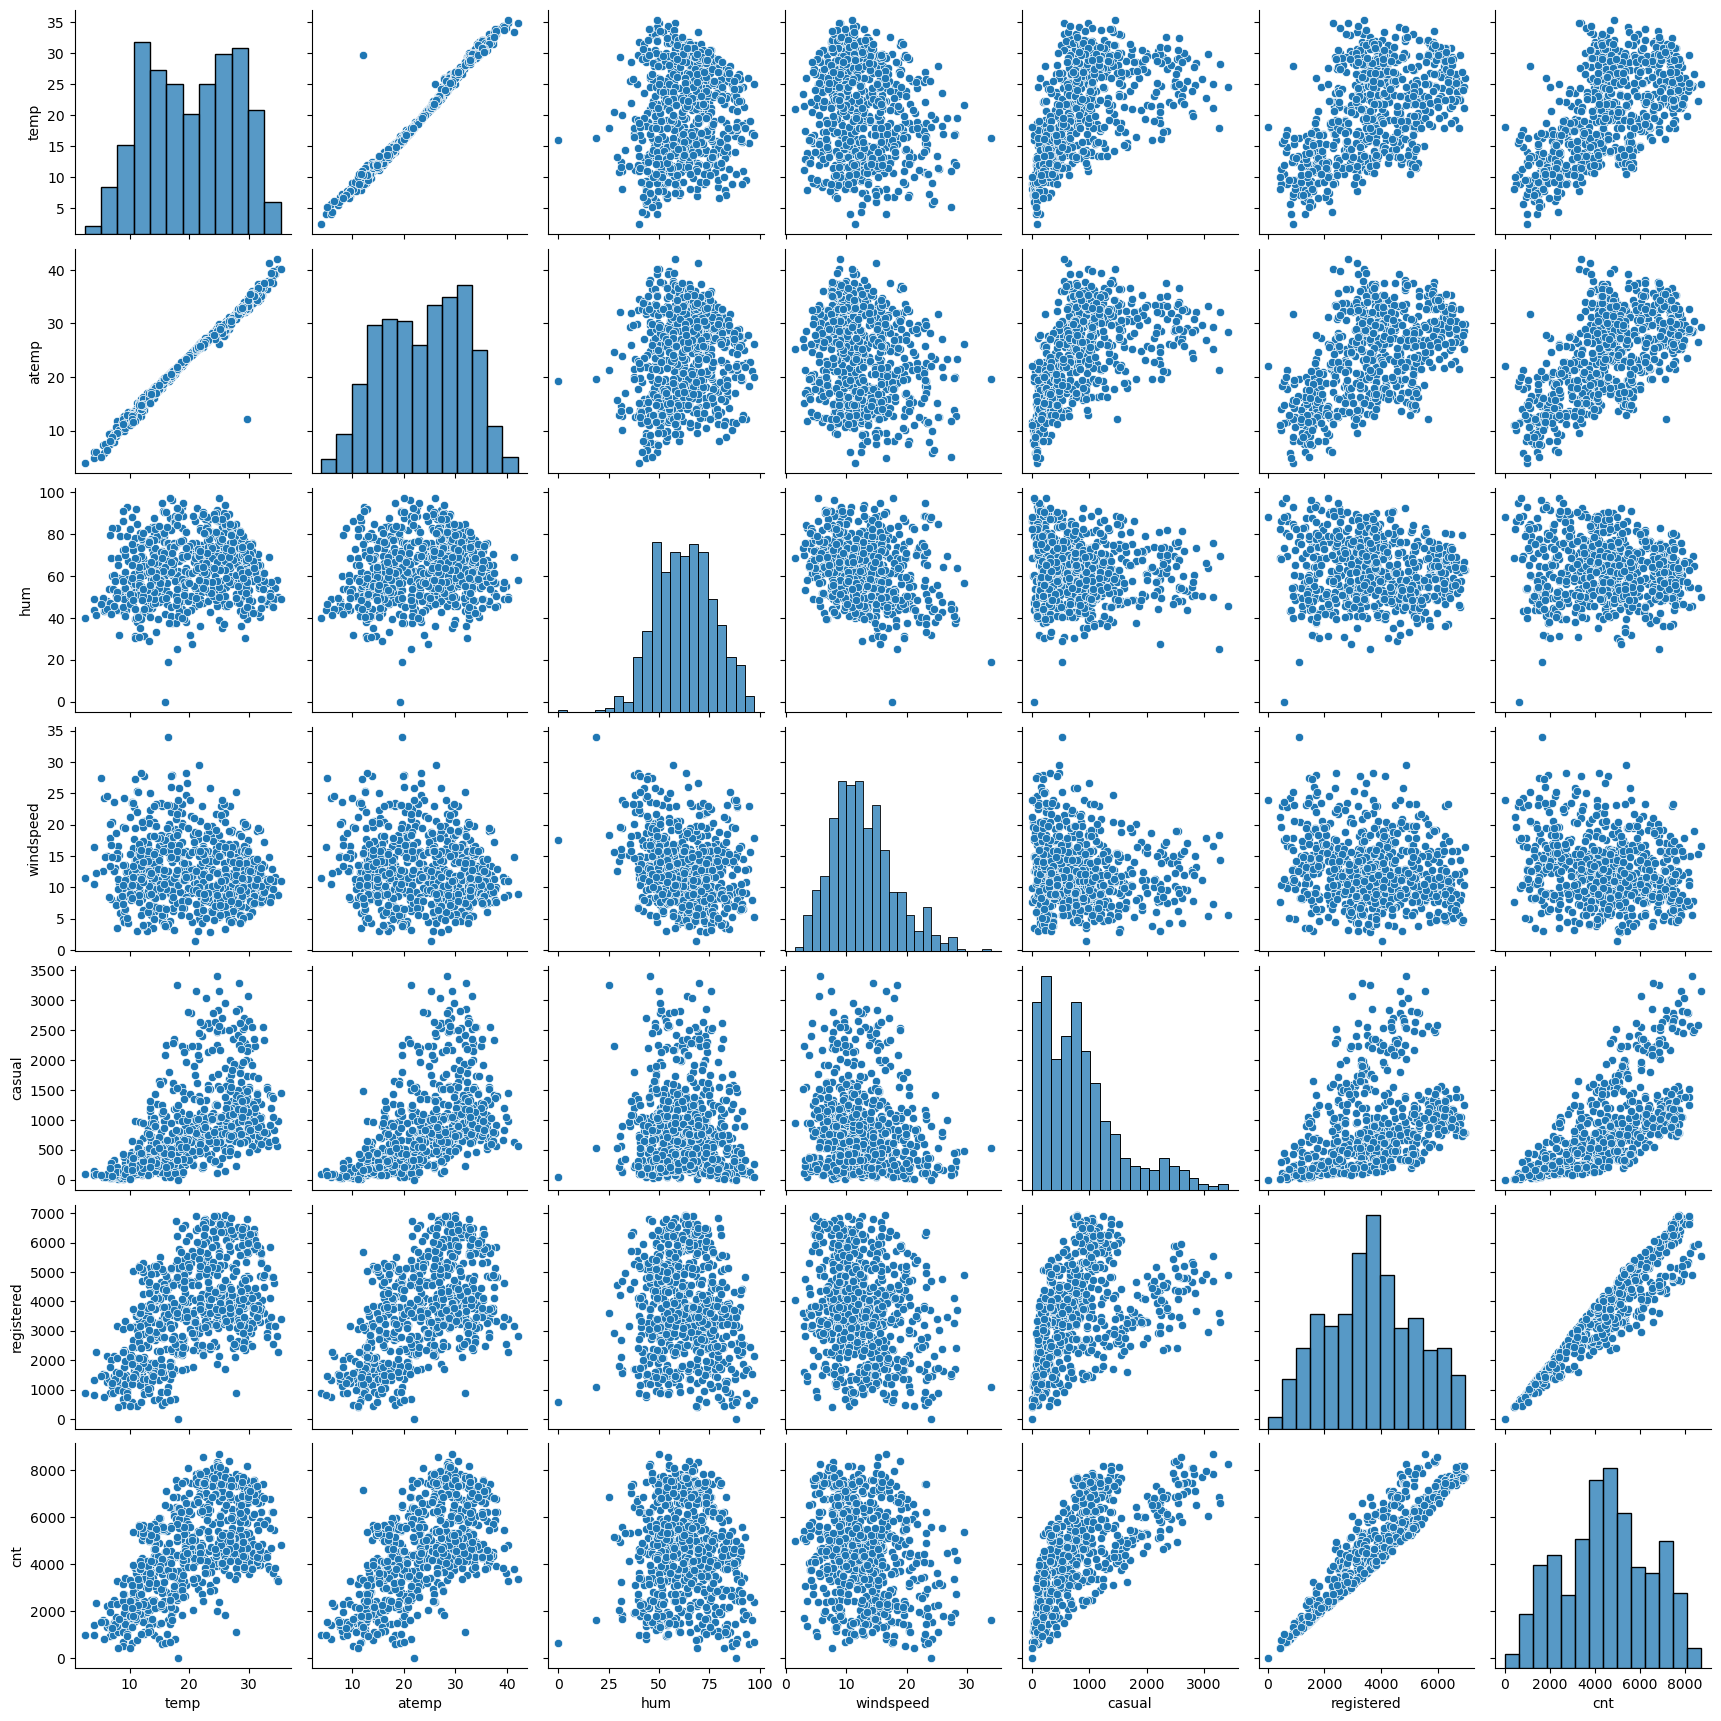

In [34]:
sns.pairplot(dataset_numeric)
plt.show()

In [35]:
#creating a correlation matrix
cor=dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

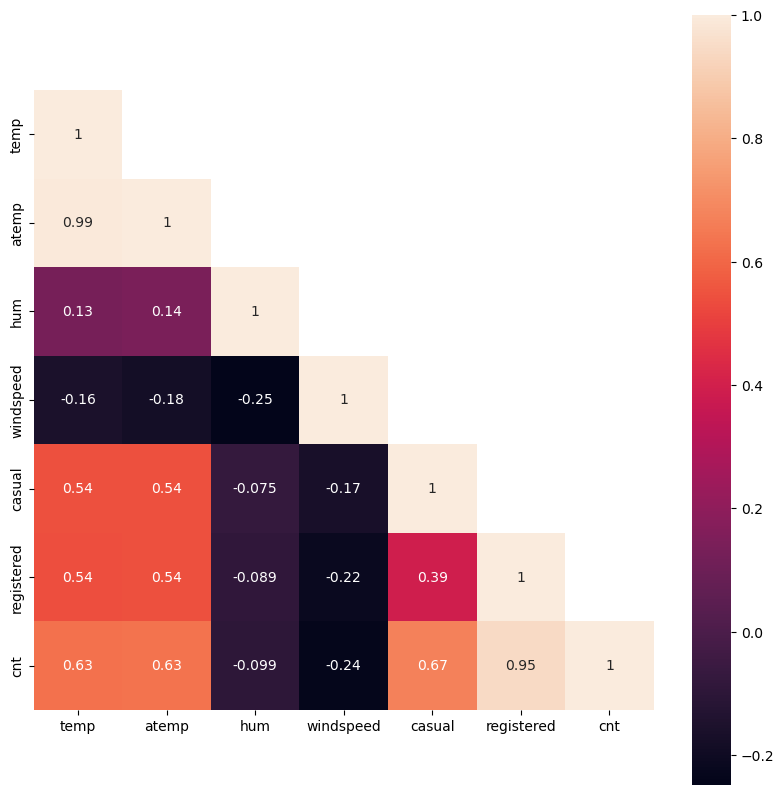

In [36]:
#generating heatmap
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=1.0,square=True,annot=True)

In [37]:
#removing atemp as it is highly correlated
dataset.drop('atemp',axis=1,inplace=True)


In [38]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [39]:
dataset_categorical=dataset.select_dtypes('object')

In [40]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [41]:
#individual splitting
dataset_dummies=pd.get_dummies(dataset_categorical,drop_first=True)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
#Drop all categorical vars as they'll not be needed
dataset=dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [43]:
#concatenate dummy vars with dataset now
dataset=pd.concat([dataset,dataset_dummies],axis=1)

In [44]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
dataset=dataset.drop(['instant','dteday'],axis=1,inplace=False)

In [46]:
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


## 4.Model Buillding and Evaluation

In [47]:
#importing libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [48]:
#split the dataset into training and test dataset
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_test,df_train=train_test_split(dataset, train_size=0.7,test_size=0.3,random_state=100)

In [49]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,29.793347,63.7917,5.459106,3065.0,2978.0,6043.0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,872.0,5339.0,6211.0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,240.0,2419.0,2659.0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,884.0,3896.0,4780.0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,736.0,4232.0,4968.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,68.7917,11.791732,318.0,2629.0,2947.0,1,...,0,0,0,0,1,0,0,0,1,0
702,1,0,1,19.509153,73.3750,11.666643,551.0,6055.0,6606.0,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,21.661653,63.1667,5.000712,1401.0,2932.0,4333.0,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,26.957500,79.3750,4.458569,728.0,6844.0,7572.0,0,...,1,0,0,0,0,0,0,1,1,0


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()

In [52]:
#apply scaler to all columns except dummies
var=["temp","hum","windspeed","casual","registered","cnt"]
df_train[var]=scaler.fit_transform(df_train[var])

In [53]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.254916,0.505149,0.516216,0.255708,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.209581,0.235390,0.238702,0.437258,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.096295,0.323690,0.359882,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.213761,0.504523,0.520241,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.347251,0.653774,0.682487,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


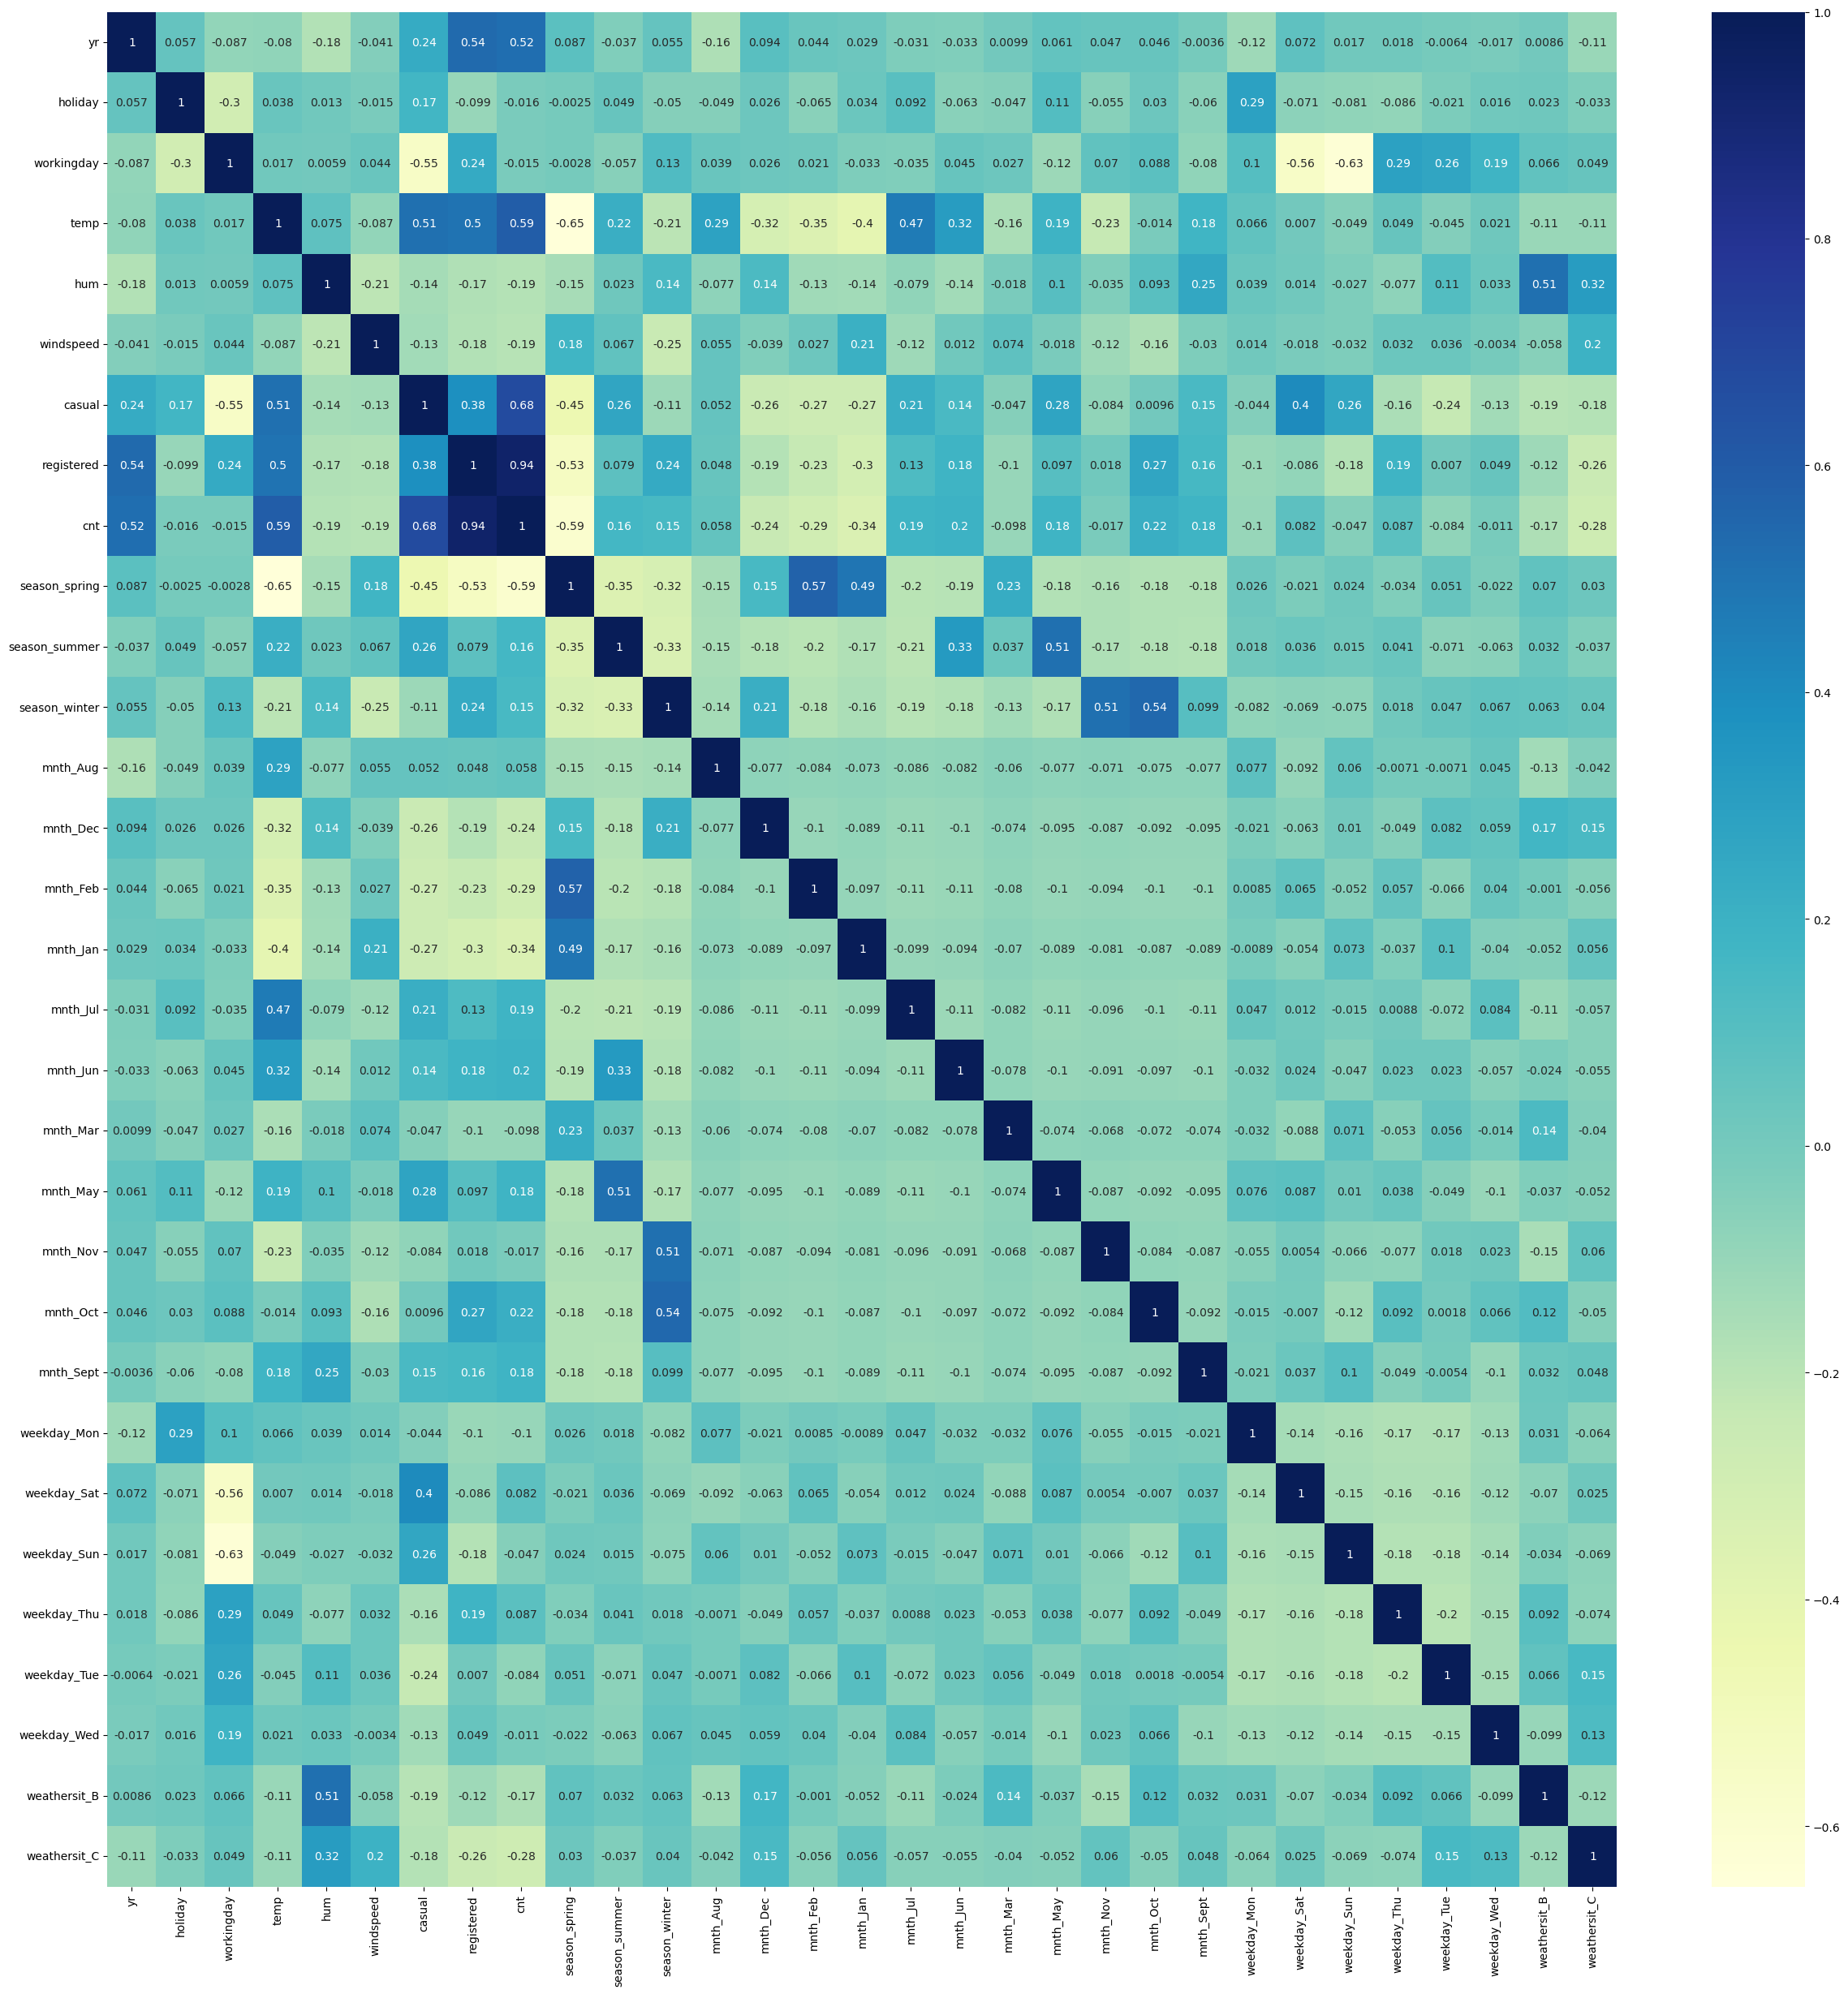

In [54]:
#chech=king correlation coeff to see which vars are highly correlated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [55]:
#dividing into dependent(x) and independent(y) varibles
y_train=df_train.pop('cnt')
x_train=df_train.drop(['casual','registered'],axis=1)

In [56]:
#creating an array to be implemented into the model
#np.array(x_train)

In [57]:
#creating statistical Model
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()

In [58]:
lr.params

const            0.339826
yr               0.253660
holiday          0.052360
workingday       0.110307
temp             0.339667
hum             -0.183760
windspeed       -0.090837
season_spring   -0.211909
season_summer   -0.055580
season_winter    0.047700
mnth_Aug        -0.050169
mnth_Dec        -0.105482
mnth_Feb        -0.020532
mnth_Jan        -0.036885
mnth_Jul        -0.071707
mnth_Jun         0.013648
mnth_Mar         0.045111
mnth_May         0.052829
mnth_Nov        -0.113587
mnth_Oct         0.033288
mnth_Sept        0.033949
weekday_Mon     -0.032577
weekday_Sat      0.109694
weekday_Sun      0.067465
weekday_Thu     -0.006661
weekday_Tue     -0.021084
weekday_Wed     -0.008485
weathersit_B    -0.034367
weathersit_C    -0.142786
dtype: float64

In [59]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
print(lm.coef_)
print(lm.intercept_)

[ 2.53660175e-01 -1.49854778e+13 -1.49854778e+13  2.90039062e-01
 -6.83593750e-02  2.11181641e-01 -4.00390625e-01  8.00781250e-02
 -1.13769531e-01 -8.10546875e-02  1.64062500e-01  2.67333984e-01
  2.17041016e-01  1.48925781e-02 -2.97851562e-02  1.61010742e-01
  1.09863281e-02  1.04003906e-01  3.72070312e-01  1.93328857e-01
 -4.98046875e-02 -1.49854778e+13 -1.49854778e+13 -1.42578125e-01
 -5.18798828e-02  1.36962891e-01 -5.57861328e-02 -3.06152344e-01]
14985477795158.383


In [61]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     44.12
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.00e-67
Time:                        12:30:32   Log-Likelihood:                 220.20
No. Observations:                 219   AIC:                            -384.4
Df Residuals:                     191   BIC:                            -289.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3398      0.055      6.153      0.000       0.231       0.449
yr                0.2537      0.014     17.942      0.000       0.226       0.282
holiday           0.0524      0.034      1.559      0.121      -0.014       0.119
workingday        0.1103      0.020      5.548      0.000       0.071       0.150
temp              0.3397      0.071      4.798      0.000       0.200       0.479
hum              -0.1838      0.052     -3.524      0.001      -0.287      -0.081
windspeed        -0.0908      0.040     -2.276      0.024      -0.170      -0.012
season_spring    -0.2119      0.049     -4.323      0.000      -0.309      -0.115
season_summer    -0.0556      0.042     -1.337      0.183      -0.138       0.026
season_winter     0.0477      0.041      1.163      0.246      -0.033       0.129
mnth_Aug         -0.0502      0.056     -0.889      0.375      -0.161       0.061
mnth_Dec         -0.1055      0.058     -1.823      0.070      -0.220       0.009
mnth_Feb         -0.0205      0.058     -0.352      0.725      -0.135       0.094
mnth_Jan         -0.0369      0.061     -0.605      0.546      -0.157       0.083
mnth_Jul         -0.0717      0.055     -1.300      0.195      -0.180       0.037
mnth_Jun          0.0136      0.037      0.370      0.712      -0.059       0.087
mnth_Mar          0.0451      0.048      0.935      0.351      -0.050       0.140
mnth_May          0.0528      0.033      1.586      0.114      -0.013       0.119
mnth_Nov         -0.1136      0.062     -1.821      0.070      -0.237       0.009
mnth_Oct          0.0333      0.059      0.568      0.571      -0.082       0.149
mnth_Sept         0.0339      0.051      0.666      0.507      -0.067       0.135
weekday_Mon      -0.0326      0.025     -1.313      0.191      -0.082       0.016
weekday_Sat       0.1097      0.022      4.987      0.000       0.066       0.153
weekday_Sun       0.0675      0.022      3.097      0.002       0.024       0.110
weekday_Thu      -0.0067      0.023     -0.295      0.768      -0.051       0.038
weekday_Tue      -0.0211      0.023     -0.930      0.354      -0.066       0.024
weekday_Wed      -0.0085      0.026     -0.320      0.749      -0.061       0.044
weathersit_B     -0.0344      0.020     -1.758      0.080      -0.073       0.004
weathersit_C     -0.1428      0.050     -2.880      0.004      -0.241      -0.045
==============================================================================
Omnibus:                       28.634   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.403
Skew:                          -0.684   Prob(JB):                     4.18e-12
Kurtosis:                       4.967   Cond. No.                     7.35e+15
================================================================

In [62]:
#Reducing features
from sklearn.feature_selection import RFE

In [63]:
lm=LinearRegression()
#Using 15 Most significant features
rfe1= RFE(estimator=lm, n_features_to_select=15)
#fitting
rfe1.fit(x_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True False  True  True  True  True  True False  True  True  True
  True  True False False False  True False False False  True False False
 False False False  True]
[ 1  1  2  1  1  1  1  1  4  1  1  1  1  1 13  6 14  1  7  8 12  1  3  9
 10 11  5  1]


In [64]:
col1=x_train.columns[rfe1.support_]

In [65]:
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'weekday_Sat', 'weathersit_C'],
      dtype='object')

In [66]:
X_train_rfe1=x_train[col1]
X_train_rfe1=sm.add_constant(X_train_rfe1)
lm1=sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     77.37
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.90e-75
Time:                        12:30:32   Log-Likelihood:                 212.04
No. Observations:                 219   AIC:                            -392.1
Df Residuals:                     203   BIC:                            -337.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5181      0.045     11.500      0.000       0.429       0.607
yr                0.2553      0.014     18.668      0.000       0.228       0.282
holiday          -0.0585      0.035     -1.672      0.096      -0.127       0.010
temp              0.3387      0.052      6.502      0.000       0.236       0.441
hum              -0.2343      0.038     -6.173      0.000      -0.309      -0.159
windspeed        -0.1142      0.038     -2.982      0.003      -0.190      -0.039
season_spring    -0.2487      0.030     -8.256      0.000      -0.308      -0.189
season_summer    -0.0933      0.019     -4.875      0.000      -0.131      -0.056
mnth_Aug         -0.1098      0.033     -3.341      0.001      -0.175      -0.045
mnth_Dec         -0.1340      0.031     -4.375      0.000      -0.194      -0.074
mnth_Feb         -0.0470      0.035     -1.339      0.182      -0.116       0.022
mnth_Jan         -0.0671      0.038     -1.765      0.079      -0.142       0.008
mnth_Jul         -0.1315      0.029     -4.606      0.000      -0.188      -0.075
mnth_Nov         -0.1183      0.032     -3.701      0.000      -0.181      -0.055
weekday_Sat       0.0148      0.020      0.728      0.467      -0.025       0.055
weathersit_C     -0.1111      0.045     -2.495      0.013      -0.199      -0.023
==============================================================================
Omnibus:                       32.609   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.151
Skew:                          -0.790   Prob(JB):                     3.89e-13
Kurtosis:                       4.940   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
a=X_train_rfe1.drop('const', axis=1)

In [69]:
#Evaluation of dataframe and VIFs
vif=pd.DataFrame()
vif['features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range (a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)

In [70]:
vif

,features,VIF
2,temp,13.61
3,hum,7.50
4,windspeed,6.05
5,season_spring,5.05
9,mnth_Feb,2.79
10,mnth_Jan,2.49
6,season_summer,2.18
0,yr,2.09
11,mnth_Jul,2.05
8,mnth_Dec,1.67


In [71]:
lm=LinearRegression()

rfe2= RFE(estimator=lm, n_features_to_select=7)
#fitting
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False  True  True  True  True False False False  True False
 False False False False False False False False False False False False
 False False False  True]
[ 1  6 10  1  1  1  1  5 12  4  1  8  7  2 21 14 22  3 15 16 20  9 11 17
 18 19 13  1]


In [72]:
col2=x_train.columns[rfe2.support_]
X_train_rfe2=x_train[col2]
X_train_rfe2=sm.add_constant(X_train_rfe2)
lm2=sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           4.78e-74
Time:                        12:30:32   Log-Likelihood:                 189.07
No. Observations:                 219   AIC:                            -362.1
Df Residuals:                     211   BIC:                            -335.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4236      0.040     10.654      0.000       0.345       0.502
yr                0.2618      0.014     18.076      0.000       0.233       0.290
temp              0.3115      0.039      7.948      0.000       0.234       0.389
hum              -0.1774      0.040     -4.461      0.000      -0.256      -0.099
windspeed        -0.1044      0.041     -2.577      0.011      -0.184      -0.025
season_spring    -0.2280      0.022    -10.497      0.000      -0.271      -0.185
mnth_Dec         -0.0836      0.027     -3.097      0.002      -0.137      -0.030
weathersit_C     -0.1321      0.048     -2.751      0.006      -0.227      -0.037
==============================================================================
Omnibus:                       16.872   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.661
Skew:                          -0.568   Prob(JB):                     3.26e-05
Kurtosis:                       3.987   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
b=X_train_rfe2.drop('const', axis=1)
#Evaluation of dataframe and VIFs
vif1=pd.DataFrame()
vif1['features']=b.columns
vif1['VIF']=[variance_inflation_factor(b.values,i) for i in range (b.shape[1])]
vif1['VIF']=round(vif['VIF'],2)
vif1=vif1.sort_values(by="VIF",ascending=False)
vif1

,features,VIF
2,hum,13.61
3,windspeed,7.50
4,season_spring,6.05
5,mnth_Dec,5.05
6,weathersit_C,2.18
0,yr,2.09
1,temp,1.07


In [74]:
#Predicting values
y_train_cnt=lm2.predict(X_train_rfe2)

<Axes: ylabel='Density'>

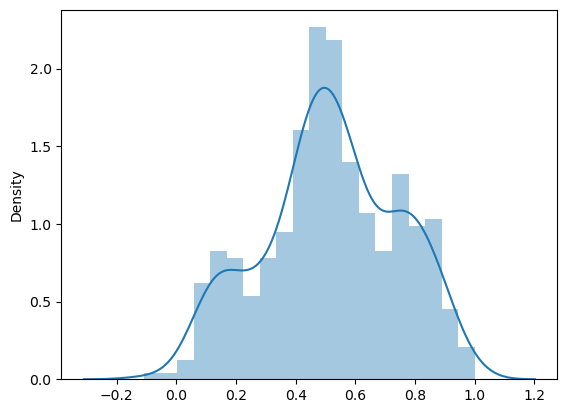

In [75]:
fig=plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [76]:
df_test[var]=scaler.transform(df_test[var])

In [77]:
y_test=df_test.pop('cnt')
x_test=df_test.drop(["registered","casual"],axis=1)

In [79]:
c=X_train_rfe2.drop('const',axis=1)
col2 = c.columns

In [80]:
x_test_rfe2=x_test[col2]

In [81]:
x_test_rfe2=sm.add_constant(x_test_rfe2)

In [82]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          510 non-null    float64
 1   yr             510 non-null    int64  
 2   temp           510 non-null    float64
 3   hum            510 non-null    float64
 4   windspeed      510 non-null    float64
 5   season_spring  510 non-null    uint8  
 6   mnth_Dec       510 non-null    uint8  
 7   weathersit_C   510 non-null    uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 25.4 KB


In [83]:
y_pred=lm2.predict(x_test_rfe2)

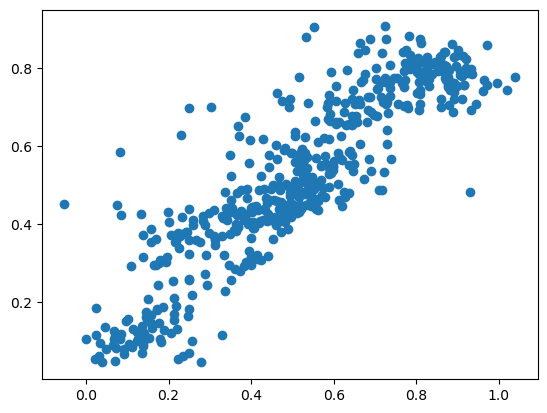

In [84]:
plt.figure()
plt.scatter(y_test,y_pred)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7822424752949879

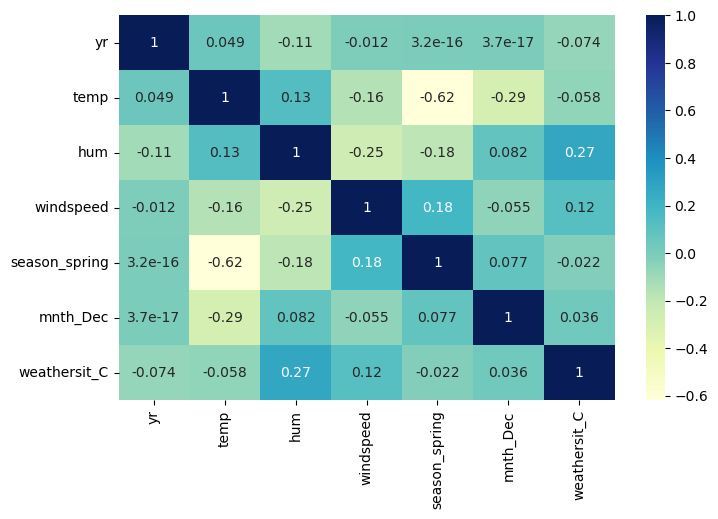

In [87]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(),cmap="YlGnBu",annot=True)
plt.show()